<font size=6>卷积神经网络</font>
# 计算机视觉-computer version
## 场景
<table>
    <tr><th>图像识别</th><th>目标检测</th><th>风格迁移</th></tr>
    <tr>
    <td><img src="images/373615de4e30035c662958ce39115fb4.png"></td>
    <td><img src="images/f8ff84bc95636d9e37e35daef5149164.png"></td>
    <td><img src="images/bf57536975bce32f78c9e66a2360e8a1.png"></td>
    </tr></table>
    
## 传统神经网络在计算机视觉领域遇到的问题
$\large (m,1000,1000,3)\to 特征向量300万维\xrightarrow{隐含层1000个单元}隐含层参数W^{[1]}是[e^3,3e^6]的矩阵，30亿个参数$


# 特征提取-feature、边缘检测-edge detection、卷积运算-Convolution 
1. 抽象特征$\to$具体特征
2. 微小特征$\to$局部特征$\to$整体特征
<img src="images/59e76bb2-2a99-4c8f-af79-a5249d8eac41.png">

## 水平边缘和垂直边缘
<img src="images/47c14f666d56e509a6863e826502bda2.png">

## 卷积运算
看一个例子，这是一个6×6的灰度图像。因为是灰度图像，所以它是6×6×1的矩阵，而不是6×6×3的，因为没有**RGB**三通道。为了检测图像中的垂直边缘，你可以构造一个3×3矩阵$\begin{bmatrix}1 & 0 & -1\\ 1 & 0 & -1\\ 1 & 0 & -1\end{bmatrix}$（在卷积神经网络的术语中，它被称为过滤器-filter），来对图像进行卷积运算。

<img src="images/7099a5373f2281626aa8ddd47a180571.png">

这个卷积运算的输出将会是一个4×4的矩阵，你可以将它看成一个4×4的图像。下面来看如何计算得到这个4×4矩阵的。为了计算第一个元素，在4×4左上角的那个元素，使用3×3的过滤器，将其覆盖在输入图像。然后进行元素乘法运算，所以$\begin{bmatrix} 3 \times 1 & 0 \times 0 & 1 \times \left(1 \right) \\ 1 \times 1 & 5 \times 0 & 8 \times \left( - 1 \right) \\ 2 \times1 & 7 \times 0 & 2 \times \left( - 1 \right) \\ \end{bmatrix} = \begin{bmatrix}3 & 0 & - 1 \\ 1 & 0 & - 8 \\ 2 & 0 & - 2 \\\end{bmatrix}$，然后将该矩阵每个元素相加得到最左上角的元素，即$3+1+2+0+0 +0+(-1)+(-8) +(-2)=-5$，这就是我们第一卷积值，然后依次类推求其他卷积值。
<img src="images/5f9c10d0986f003e5bd6fa87a9ffe04b.png">

## 垂直边缘检测
1. 抽象特征
2. 加强特征
<img src="images/0c8b5b8441557b671431d515aefa1e8a.png">

# 边缘检测-过滤器-filter
## 区分敏感变化
<img src="images/6a248e5698d1f61ac4ba0238363c4a37.png">

## 水平边缘过滤器
1. 渐变边缘
<img src="images/f4adb9d91879e1c1aaef9bc9e244c64a.png">

## 过滤器作为参数
<img src="images/f889ad7011738a23d78070e8ed2df04e.png">

# 填充-padding
假设输入图片的大小为$n×n$，而过滤器的大小为$ f×f$，则卷积后的输出图片大小为$ (n−f+1)×(n−f+1)$。

**这样就有两个问题：**
1. 每次卷积运算后，输出图片的尺寸缩小；
2. 原始图片的角落、边缘区像素点在输出中采用较少，输出图片丢失边缘位置的很多信息。

为了解决这些问题，可以在进行卷积操作前，对原始图片在边界上进行填充（Padding），以增加矩阵的大小。通常将0作为填充值。填充模式分为如下三种：
<table>
    <tr>
        <th>full</th><th>same</th><th>valid</th>
    </tr>
    <tr><td>从filter和image刚相交开始做卷积</td><td>$(n+2p-f+1)×(n+2p-f+1)\\p=\frac{f-1}{2}$<br>same模式也是最常见的模式，因为这种模式可以在前向传播的过程中让特征图的大小保持不变</td><td>当filter全部在image里面的时候，进行卷积运算，可见filter的移动范围较same更小了</td></tr>
    <tr><td><img src="images/20180515205400757.png"></td>
        <td><img src="images/20180515205624201.png"></td>
        <td><img src="images/20180515205946981.png"></td>
    </tr>
</table>

**过滤器的大小：**
1. 如果$f$是一个偶数，那么你只能使用一些不对称填充。只有$f$是奇数的情况下，**Same**卷积才会有自然的填充，我们可以以同样的数量填充四周，而不是左边填充多一点，右边填充少一点，这样不对称的填充。
2. 一个奇数维过滤器，比如3×3或者5×5的，它就有一个中心点。有时在计算机视觉里，如果有一个中心像素点会更方便，便于指出过滤器的位置。

# 卷积步长-Stride
卷积过程中，有时需要通过填充来避免信息损失，有时也需要通过设置步长（Stride）来压缩一部分信息。步长表示滤波器在原始图片的水平方向和垂直方向上每次移动的距离。之前，步长被默认为 1。

**输出图片大小的计算：**
设步长为 s，填充长度为 p，输入图片大小为 n×n，滤波器大小为 f×f，则卷积后图片的尺寸为：
$$\left\lfloor\frac{n+2p - f}{s} + 1 \right\rfloor\times\left\lfloor\frac{n+2p - f}{s} + 1\right\rfloor,\left\lfloor\right\rfloor表示向下取整的符号$$

**例**

下面例子的输出大小为：$\frac{7+2\times0 - 3}{2} + 1=3$
<img src="images/9cacda308d53adb7d154a3b259569f45.png">

# 高维卷积
如果我们想要对三通道的 RGB 图片进行卷积运算，那么其对应的滤波器组也同样是三通道的。过程是将每个单通道（R，G，B）与对应的滤波器进行卷积运算求和，然后再将三个通道的和相加，将 27 个乘积的和作为输出图片的一个像素值。

不同通道的滤波器可以不相同。例如只检测 R 通道的垂直边缘，G 通道和 B 通道不进行边缘检测，则 G 通道和 B 通道的滤波器全部置零。当输入有特定的高、宽和通道数时，滤波器可以有不同的高和宽，**但通道数必须和输入一致**。
<img src="images/9b0b0e9062f8814a6a462ea64449f89e.png">

如果想同时检测垂直和水平边缘，或者更多的边缘检测，可以增加更多的滤波器组。例如设置第一个滤波器组实现垂直边缘检测，第二个滤波器组实现水平边缘检测。设输入图片的尺寸为$n\times n\times n_c（n_c为通道数）$，滤波器尺寸为$f\times f\times n_c$，则卷积后的输出图片尺寸为 $(n−f+1)\times (n−f+1)\times n^{'}_c,n^{'}_c$为滤波器组的个数。
<img src="images/794b25829ae809f93ac69f81eee79cd1.png">

# 卷积网络-前向传播
## 公式
**神经网络：**

$z^{[l]} = W^{[l]}a^{[l-1]} + b^{[l]}$

$a^{[l]} = g(z^{[l]})$

**卷积网络：**

$z^{[l]} = c(W^{[l]},a^{[l-1]}) + b^{[l]}$

$a^{[l]} = g(z^{[l]})$

<img src="images/1236aad1426bd324964091f1d9db2587.png">

## 形状
用$f^{[l]}$表示过滤器大小，即$f×f$，上标$\lbrack l\rbrack$表示$l$层中过滤器大小为$f×f$。通常情况下，上标$\lbrack l\rbrack$用来标记$l$层。用$p^{[l]}$来标记**padding**的数量，**padding**数量也可指定为一个**valid**卷积，即无**padding**，或是**same**卷积，即选定**padding**，如此一来，输出和输入图片的高度和宽度就相同了。用$s^{[l]}$标记步幅。

输入矩阵$A^{[l-1]}$的大小为$m\times n_{H}^{\left\lbrack l - 1 \right\rbrack} \times n_{W}^{\left\lbrack l - 1 \right\rbrack} \times n_{c}^{\left\lbrack l - 1\right\rbrack}$

输出矩阵$A^{[l]}$的大小为$m\times n_{H}^{[l]} \times n_{W}^{[l]} \times n_{c}^{[l]}$

$n_{c}^{[l]}$为$l$层过滤器个数,$m$为样本个数

其中，$n_{H}^{[l]} = \lfloor\frac{n_{H}^{\left\lbrack l - 1 \right\rbrack} +2p^{[l]} - f^{[l]}}{s^{[l]}} +1\rfloor，n_{W}^{[l]}依次类推$

过滤器集合$W^{[l]}$的大小为$ n_{c}^{[l]}\times f^{[l]} \times f^{[l]} \times  n_{c}^{[l - 1]}$

截距项$b^{[l]}$的大小为$n_{c}^{[l]}\times 1\times 1\times 1$

# 卷积网络示例
$
\large\underset{l=0}{\underbrace{\left [ m,n_H=39,n_W=39,n_c=3 \right ]}}\xrightarrow[f_H=f_W=3,s=1,p=0,filters=10]{}\\
\large\underset{l=1}{\underbrace{\left [ m,n_H=37,n_W=37,n_c=10 \right ]}}\xrightarrow[f_H=f_W=5,s=2,p=0,filters=20]{}\\
\large\underset{l=2}{\underbrace{\left [ m,n_H=17,n_W=17,n_c=20 \right ]}}\xrightarrow[f_H=f_W=5,s=2,p=0,filters=40]{}\\
\large\underset{l=3}{\underbrace{\left [ m,n_H=7,n_W=7,n_c=40 \right ]}}\to\\
\large\underset{l=3}{\underbrace{\left [ m,7\times 7\times 40=1960\right ]}}\xrightarrow[softmax]{}\hat y
$

# 卷积神经网络隐含层的类型
1. 卷积层：Conv，有卷积核产生的激活层;
2. 池化层：POOL，特殊的卷积层，**不含参数且不同的通道/depth上分开执行的卷积核**；
3. 全连接层：FC-Full Connection，普通的神经网络隐含层，通常作为输出层；

# 池化层-POOL
1. POOL池化层，最大的特定即与卷积层的区别是，不含参数且不同的通道/depth上分开执行的卷积核；
2. **通道数$n_c^{[l]}=n_c^{[l-1]}$**，
2. 同卷积层一样，包含超参数：
    1. 滤器filter大小$[f_W,f_H]$，
    2. 填充padding，$p$,
    3. 步长Stride，$s$,

## 类型
1. 平均池化层-average pooling
2. 最大池化层-max pooling
3. etc.

## 最大池化层
max pooling的操作如下图所示：整个图片被分割成若干个同样大小的小块（pooling size）。每个小块内只取最大的数字，再舍弃其他节点后，保持原有的平面结构得出output。
<img src="images/ed201fd1f1132c66648ca9cb86d5cd4b.jpg">

max pooling在不同的depth上是分开执行的，且不需要参数控制。Max pooling的主要功能是downsampling-降采样，却不会损坏识别结果。
<img src="images/f67c33653a031a4f499bf523b6e45283.jpg">

# 卷积神经网络示例
卷积神经网络大致就是covolutional layer, pooling layer, ReLu layer, fully-connected layer的组合，例如下图所示的结构。
<img src="images/93fba35bdf177a53f1635288c987c37a.jpg">

**形状和参数量，例：**
<img src="images/b715a532e64edaa241c27eef9fdc9bfd.png">
**注：**
1. 令卷积核的不同通道的参数相等；

# 为什么使用卷积？
## 优势
和只用全连接层相比，卷积层的两个主要优势在于参数共享和稀疏连接。

1. 参数共享，不同位置的数据使用相同的卷积核；
2. 稀疏链接，一次卷积只有部分数据参与；

## 不变性
1. 平移不变性
2. 旋转和视角不变性
3. 尺寸不变性

<img src="images/f036d884670284321c02d1afdbec7859.jpg">

# 卷积神经网络（CNN）的模块练习
现在我们练习使用Numpy实现卷积层（CONV）和池化层（POOL）的前向传播（forward propagation）和反向传播（ backward propagation）。
<img src="images/78b7fb4d5a0e16b587f448d6e5dc84c9.png">
## 环境准备

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## 前向传播
### 卷积层
卷积层利用卷积核（卷积过滤器）将输入的数据卷积为不同形状的输出数据。
<img src="images/7caba155fe2eec89ee0b53bb1b4d9f01.png"  style="width:350px;height:200px;">

### Zero-Padding
零填充的作用是将零值填充到图像的边缘。
<img src="images/9a91e423233cb015d469d42c56b20baa.png" style="width:600px;height:400px;">

**作用：**
1. 使数据经过卷积之后高度和宽度保持不变，例如，**same**模式；
2. 如果没有填充的话，边缘数据的影响权重相对来说较小，填充可以解决这个问题；

In [2]:
def zero_pad(X, pad):
    """
    对四维数据进行padding
    """
    X_pad = np.pad(X, ((0, 0),(pad, pad),(pad, pad),(0, 0)), 'constant', constant_values=0)
    return X_pad

In [3]:
x=np.random.randn(4,3,3,2)
x_pad=zero_pad(x,2)

In [4]:
x.shape,x_pad.shape

((4, 3, 3, 2), (4, 7, 7, 2))

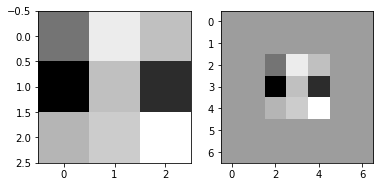

In [5]:
fig,axs=plt.subplots(1,2)
axs[0].imshow(x[0,:,:,0])
axs[1].imshow(x_pad[0,:,:,0])

### 单步卷积操作
这里我们实现一个卷积操作函数，实现对某个待卷积数据的卷积操作，并且得到卷积值。
<img src="images/9b5d8b7ba3f91d34f7e2b6159ad4abf1.gif" style="width:500px;height:300px;">

**注：**
1. 矩阵点乘在求和

In [6]:
def  conv_single_step(a_slice_prev,W,b):
    s=np.sum(np.multiply(a_slice_prev,W))+b
    return s

In [7]:
conv_single_step(np.random.randn(4,4,3),np.random.randn(4,4,3),np.random.randn())

3.362141595840531

### 卷积操作
在单一样本的卷积神经网络前向传播过程中，卷积层每个卷积核产生一个二维数据，多个卷积核的输出可以堆叠出和输入数据相同张量（3）的三维数据。

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

In [8]:
def conv_forward(A_prev, W, b, hparameters):
    # 获得输入数据的维度数据
    (m, n_H_prev, n_W_prev, n_C_prev1) = A_prev.shape
    # 卷积核的维度数据
    (f, f, n_C_prev, n_C) = W.shape
    
    assert n_C_prev1==n_C_prev

    stride = hparameters['stride']
    pad = hparameters['pad']

    n_H = 1 + int((n_H_prev + 2 * pad - f) / stride)# 输出数据的高
    n_W = 1 + int((n_W_prev + 2 * pad - f) / stride)# 输出数据的宽

    Z = np.zeros((m, n_H, n_W, n_C))

    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):                                 # 遍历样本
        a_prev_pad = A_prev_pad[i]                     # 获取填充后的输入数据
        for h in range(n_H):                           # 遍历高度
            for w in range(n_W):                       # 遍历宽度
                for c in range(n_C):                   # 遍历通道
                    
                    # 定位
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # 获取待卷积数据
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                  
                    # 单步卷积操作
                    Z[i, h, w, c] = np.sum(np.multiply(a_slice_prev, W[:, :, :, c]) + b[:, :, :, c])
    
    # 核查形状
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # 保存信息，以备反向传播使用
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [9]:
A_prev=np.random.randn(10,4,4,3)
W=np.random.randn(2,2,A_prev.shape[3],8)
b=np.random.randn(1,1,1,W.shape[3])
A_prev.shape,W.shape,b.shape

((10, 4, 4, 3), (2, 2, 3, 8), (1, 1, 1, 8))

In [10]:
hparameters={'pad':2,"stride":1}
Z,cache_conv=conv_forward(A_prev,W,b,hparameters)
Z.shape

(10, 7, 7, 8)

### 池化操作
$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$
$$ n_C = n_{C_{prev}}$$
<table>
<td>
<img src="images/ef39f1ae883591583a782c61429f1f22.png" style="width:500px;height:300px;">
<td>
<td>
<img src="images/f937baeb02afa8054d19effba6f1a3a8.png" style="width:500px;height:300px;">
<td>
</table>

**同卷积操作的不同：**
1. 对每一层通道分别做池化，输入通道=输出通道；
2. 一般没有零填充；

In [11]:
def pool_forward(A_prev, hparameters, mode = "max"):    
    # 获取输入数据的维度信息
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # 获取参数信息
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # 计算输出数据的维度信息
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # 初始输出数据内存
    A = np.zeros((m, n_H, n_W, n_C))              

    for i in range(m):                           # 遍历样本
        for h in range(n_H):                     # 遍历高
            for w in range(n_W):                 # 遍历宽
                for c in range (n_C):            # 遍历通道
                    
                    # 定位
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # 获取单步池化数据
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    
                    # 不同类型的池化操作
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
        
    # 保存信息，以备反向传播使用
    cache = (A_prev, hparameters)
    
    # 核查性质
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [13]:
A_prev=np.random.randn(2,4,4,3)
hparameters={"stride":1,"f":4}
A,cache=pool_forward(A_prev,hparameters)

In [14]:
A.shape

(2, 1, 1, 3)

In [15]:
A

array([[[[2.1656048 , 1.52669475, 1.05151787]]],


       [[[1.04562939, 1.69453761, 1.43035074]]]])

In [16]:
A,cache=pool_forward(A_prev,hparameters,mode="average")
A

array([[[[-0.13615407,  0.14597596, -0.38591061]]],


       [[[-0.22439704, -0.02152892,  0.12799356]]]])

## 反向传播
### 卷积层
$h:输出数据的高度；\\w:输出数据的宽度；$
#### dA
$$ dA += \sum _{h=0} ^{n_H} \sum_{w=0} ^{n_W} W_c \times dZ_{hw}$$
#### dW
$$ dW_c  += \sum _{h=0} ^{n_H} \sum_{w=0} ^ {n_W} a_{slice} \times dZ_{hw}$$
#### db
$$ db = \sum_h \sum_w dZ_{hw} \tag{3}$$

In [17]:
def conv_backward(dZ, cache):
    # 获取缓存信息
    (A_prev, W, b, hparameters) = cache
    
    # 获取输入层的维度信息
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # 获取卷积核的维度信息
    (f, f, n_C_prev, n_C) = W.shape
    
    # 获取超参数信息
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # 获取输出层微分数据的信息
    (m, n_H, n_W, n_C) = dZ.shape
    
    # 初始化本次对应微分项目的内存
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))                           
    dW = np.zeros((f, f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))

    # 零填充
    A_prev_pad = zero_pad(A_prev, pad)
    dA_prev_pad = zero_pad(dA_prev, pad)
    
    for i in range(m):                       # 遍历样本
        a_prev_pad = A_prev_pad[i]
        da_prev_pad = dA_prev_pad[i]
        
        for h in range(n_H):                   # 遍历高度
            for w in range(n_W):               # 遍历宽度
                for c in range(n_C):           # 遍历不同卷积核
                    
                    # 定位
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # 获取定位的输入的卷积区域
                    a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]

                    # 更新微分值
                    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
                    dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
                    db[:,:,:,c] += dZ[i, h, w, c]
                    
        dA_prev[i, :, :, :] = dA_prev_pad[i, pad:-pad, pad:-pad, :]
    # 核查
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    
    return dA_prev, dW, db

In [20]:
dA,dW,db=conv_backward(Z,cache_conv)

In [21]:
dA.shape,dW.shape,db.shape

((10, 4, 4, 3), (2, 2, 3, 8), (1, 1, 1, 8))

### 池化层
#### 最大池化
$$ X = \begin{bmatrix}
1 && 3 \\
4 && 2
\end{bmatrix} \quad \rightarrow  \quad M =\begin{bmatrix}
0 && 0 \\
1 && 0
\end{bmatrix}$$

In [23]:
def create_mask_from_window(x):
    return x==np.max(x)

In [24]:
x=np.random.randn(2,3)
x,create_mask_from_window(x)

(array([[-1.18580165, -0.37167479, -0.89046327],
        [ 0.7089688 , -0.67326325, -1.2156681 ]]),
 array([[False, False, False],
        [ True, False, False]]))

#### 平均池化
$$ dZ = 1 \quad \rightarrow  \quad dZ =\begin{bmatrix}
1/4 && 1/4 \\
1/4 && 1/4
\end{bmatrix}$$

In [25]:
def distribute_value(dz, shape):
    (n_H, n_W) = shape
    average = dz / (n_H * n_W)
    a = np.ones(shape) * average
    return a

In [26]:
distribute_value(2,(2,2))

array([[0.5, 0.5],
       [0.5, 0.5]])

#### 池化反向传播

In [27]:
def pool_backward(dA, cache, mode = "max"):    
    (A_prev, hparameters) = cache
    
    stride = hparameters['stride']
    f = hparameters['f']

    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape
    
    dA_prev = np.zeros_like(A_prev)
    
    for i in range(m):                     
        a_prev = A_prev[i]
        
        for h in range(n_H):                  
            for w in range(n_W):         
                for c in range(n_C):  

                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f

                    if mode == "max":
                        
                        a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]
                        
                        mask = create_mask_from_window(a_prev_slice)
                        
                        dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += mask * dA[i, vert_start, horiz_start, c]
                        
                    elif mode == "average":
                        da = dA[i, vert_start, horiz_start, c]

                        shape = (f, f)
                        
                        dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += distribute_value(da, shape)
    assert(dA_prev.shape == A_prev.shape)
    
    return dA_prev

In [28]:
A_prev=np.random.randn(5,5,3,2)
hparameters={"stride":1,"f":2}
A,cache=pool_forward(A_prev,hparameters)

dA=np.random.randn(5,4,2,2)

dA_prev=pool_backward(dA,cache,mode="max")

In [29]:
dA_prev.shape

(5, 5, 3, 2)

In [31]:
dA_prev=pool_backward(dA,cache,mode="average")

In [32]:
dA_prev.shape

(5, 5, 3, 2)

# TensorFlow-CNN
前一节的练习是为了让我们更加了解卷积神经网络的原理和实现细节。其中，讲到的所有CNN的功能逻辑，都在现代成熟框架中得以高效的实现，后面我们用TensorFlow实现一个CNN模型。
<img src="images/6c8d61508321ac444175370124200350.png" style="width:800px;height:300px;">

## 环境准备


In [34]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops

%matplotlib inline

## 加载数据

In [35]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [36]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y=1


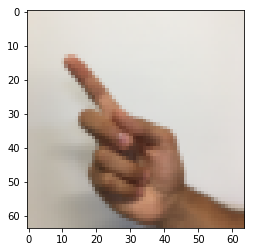

In [40]:
index=8
plt.imshow(X_train_orig[index])
print("y="+str(np.squeeze(Y_train_orig[:,index])))

In [41]:
X_train_orig.shape,X_test_orig.shape

((1080, 64, 64, 3), (120, 64, 64, 3))

In [42]:
Y_train_orig.shape,Y_test_orig.shape

((1, 1080), (1, 120))

## 清洗数据

In [43]:
X_train=X_train_orig/255
X_test=X_test_orig/255

In [44]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [45]:
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

In [48]:
X_train.shape,X_test.shape

((1080, 64, 64, 3), (120, 64, 64, 3))

In [49]:
Y_train.shape,Y_test.shape

((1080, 6), (120, 6))

## Create placeholders

In [50]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    X = tf.placeholder(tf.float32, shape=(None, n_H0, n_W0, n_C0))
    Y = tf.placeholder(tf.float32,shape=(None,n_y))    
    return X, Y

In [51]:
X,Y=create_placeholders(64,64,3,6)

In [52]:
X,Y

(<tf.Tensor 'Placeholder:0' shape=(?, 64, 64, 3) dtype=float32>,
 <tf.Tensor 'Placeholder_1:0' shape=(?, 6) dtype=float32>)

## Initialize parameters

In [53]:
def initialize_parameters():    
    tf.set_random_seed(1)
    W1 =tf.get_variable('W1',[4,4,3,8],initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable('W2',[2,2,8,16],initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    parameters = {"W1": W1,
                  "W2": W2}    
    return parameters

In [55]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters=initialize_parameters()
    init=tf.global_variables_initializer()
    sess_test.run(init)
    print(parameters['W1'].eval()[1,1,1])
    print(parameters['W2'].eval()[1,1,1])

[ 0.00131723  0.1417614  -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
[-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]


## Forward propagation

In [56]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']

    Z1 = tf.nn.conv2d(X,W1, strides = [1,1,1,1], padding = 'SAME')

    A1 = tf.nn.relu(Z1)

    P1 = tf.nn.max_pool(A1, ksize = [1,8,8,1], strides = [1,8,8,1], padding = 'SAME')

    Z2 = tf.nn.conv2d(P1,W2, strides = [1,1,1,1], padding = 'SAME')

    A2 = tf.nn.relu(Z2)

    P2 = tf.nn.max_pool(A2, ksize = [1,4,4,1], strides = [1,4,4,1], padding = 'SAME')

    P2 = tf.contrib.layers.flatten(P2)

    Z3 = tf.contrib.layers.fully_connected(P2, num_outputs = 6, activation_fn=None)

    return Z3

In [57]:
tf.reset_default_graph()
with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)   
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,64,64,3), Y: np.random.randn(2,6)})
    print("Z3 = " + str(a))

Z3 = [[ 1.4416984  -0.24909666  5.450499   -0.2618962  -0.20669907  1.3654671 ]
 [ 1.4070846  -0.02573211  5.08928    -0.48669922 -0.40940708  1.2624859 ]]


## Compute cost

In [58]:
def compute_cost(Z3, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3, labels=Y))   
    return cost

In [59]:
tf.reset_default_graph()
with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(4,64,64,3), Y: np.random.randn(4,6)})
    print("cost = " + str(a))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = 4.6648693


## Model

In [62]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    
    m = X.shape[0]  
    mini_batches = []
    np.random.seed(seed)

    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:]

    num_complete_minibatches = math.floor(m/mini_batch_size) 
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [63]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009,
          num_epochs = 100, minibatch_size = 64, print_cost = True):
    
    ops.reset_default_graph()                       
    tf.set_random_seed(1)                        
    seed = 3                                          
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []             

    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)

    parameters = initialize_parameters()

    Z3 = forward_propagation(X, parameters)

    cost = compute_cost(Z3, Y)

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    init = tf.global_variables_initializer()

    with tf.Session() as sess:

        sess.run(init)

        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size)
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                (minibatch_X, minibatch_Y) = minibatch

                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
                
                minibatch_cost += temp_cost / num_minibatches

            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, test_accuracy, parameters

Cost after epoch 0: 1.921332
Cost after epoch 5: 1.904156
Cost after epoch 10: 1.904309
Cost after epoch 15: 1.904477
Cost after epoch 20: 1.901876
Cost after epoch 25: 1.784078
Cost after epoch 30: 1.681051
Cost after epoch 35: 1.618206
Cost after epoch 40: 1.597971
Cost after epoch 45: 1.566706
Cost after epoch 50: 1.554487
Cost after epoch 55: 1.502187
Cost after epoch 60: 1.461036
Cost after epoch 65: 1.304490
Cost after epoch 70: 1.201760
Cost after epoch 75: 1.163242
Cost after epoch 80: 1.102885
Cost after epoch 85: 1.087105
Cost after epoch 90: 1.051911
Cost after epoch 95: 1.018554


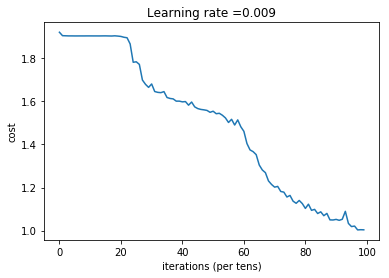

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.6666667
Test Accuracy: 0.5833333


In [64]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)